In [1]:
import csv

STOCKS_FILE_NAME = 'N5.csv'

def get_stocks():
    with open(STOCKS_FILE_NAME, 'r') as f:
        reader = csv.reader(f, delimiter=',', quotechar='"')
        stocks = [stock.strip() for row in reader for stock in row]
    return stocks

stocks = get_stocks()
stocks

['AAPL', 'GOOG', 'BAC', 'WTW', 'PCRX', 'LOW', 'CRM']

In [2]:
from datetime import datetime, timedelta
import pytz
import pandas as pd
import numpy as np
import requests

DATA_TIMEZONE = pytz.timezone("EST")

def get_trading_dates(today):
    """
    Returns the dates for the latest 10 trading days
    """
    url = "https://query1.finance.yahoo.com/v7/finance/chart/X?period1={:.0f}&period2={:.0f}"\
          "&interval=1d&includeTimestamps=true".format((today - timedelta(days=20)).timestamp(), today.timestamp())
    page = requests.get(url)
    chart = page.json()['chart']        

    result = chart['result'][0]
    start = datetime.fromtimestamp(result['timestamp'][-10], tz=DATA_TIMEZONE)
    end = datetime.fromtimestamp(result['timestamp'][-1], tz=DATA_TIMEZONE).replace(hour=16, minute=0)
    return start, end
            
get_trading_dates(datetime.now(tz=DATA_TIMEZONE).replace(hour=16, minute=0, second=0, microsecond=0))

(datetime.datetime(2017, 2, 17, 9, 30, tzinfo=<StaticTzInfo 'EST'>),
 datetime.datetime(2017, 3, 3, 16, 0, tzinfo=<StaticTzInfo 'EST'>))

In [28]:
def get_data(symbol, start_date, end_date, raw_response=False):
        
    url = "https://query1.finance.yahoo.com/v7/finance/chart/{}?period1={:.0f}&period2={:.0f}"\
          "&interval=1m&indicators=quote&includeTimestamps=true&"\
          "events=div%7Csplit%7Cearn".format(symbol, start_date.timestamp(), end_date.timestamp())
    page = requests.get(url)
    chart = page.json()['chart']
        
    if chart['error']:
        print(chart['error'])

    result = chart['result'][0]
    if raw_response:
        return result
    data = result['indicators']['quote'][0]
    data['time'] = [datetime.fromtimestamp(t, tz=DATA_TIMEZONE) for t in result['timestamp']]
    df = pd.DataFrame(data)
    return df[df.volume.notnull()]
   
today = datetime.now(tz=DATA_TIMEZONE).replace(hour=16, minute=0, second=0, microsecond=0)
start, end = get_trading_dates(today)
dd = get_data("GOOG", start, end)
dd

,close,high,low,open,time,volume
0,823.520020,823.520020,823.320007,823.320007,2017-02-17 09:30:00-05:00,0.0
1,823.359985,823.359985,822.609985,822.609985,2017-02-17 09:31:00-05:00,3221.0
3,822.070007,822.992493,822.070007,822.992493,2017-02-17 09:33:00-05:00,4692.0
4,822.093201,822.260010,822.093201,822.260010,2017-02-17 09:34:00-05:00,5458.0
5,823.179993,823.179993,822.250000,822.250000,2017-02-17 09:35:00-05:00,7635.0
6,823.000000,823.000000,823.000000,823.000000,2017-02-17 09:36:00-05:00,3428.0
7,822.469971,823.539978,822.469971,823.539978,2017-02-17 09:37:00-05:00,2581.0
8,823.000000,823.000000,823.000000,823.000000,2017-02-17 09:38:00-05:00,3078.0
9,824.000000,824.000000,823.599976,823.599976,2017-02-17 09:39:00-05:00,8381.0
10,824.299988,824.299988,824.164795,824.164795,2017-02-17 09:40:00-05:00,5356.0


In [29]:
avg9days = dd[dd.time.dt.date != end.date()].volume.mean()
print(avg9days)
dd = dd[dd.time.dt.date == end.date()].copy()
dd_len = len(dd)
dd['current_score'] = dd.volume / avg9days
dd['rolling_score'] = dd.current_score.rolling(window=dd_len, min_periods=1).mean()
dd

3613.93443666


,close,high,low,open,time,volume,current_score,rolling_score
3510,830.000000,830.329956,830.000000,830.329956,2017-03-03 09:30:00-05:00,20776.0,5.748859,5.748859
3511,829.289978,829.500061,829.289978,829.500061,2017-03-03 09:31:00-05:00,2966.0,0.820712,3.284786
3512,829.440002,829.440002,829.440002,829.440002,2017-03-03 09:32:00-05:00,2006.0,0.555074,2.374882
3513,830.010010,830.259949,830.010010,830.259949,2017-03-03 09:33:00-05:00,6718.0,1.858916,2.245890
3514,830.000000,830.000000,830.000000,830.000000,2017-03-03 09:34:00-05:00,2470.0,0.683466,1.933405
3515,829.011230,829.011230,829.011230,829.011230,2017-03-03 09:35:00-05:00,1658.0,0.458780,1.687634
3516,829.859985,829.859985,829.859985,829.859985,2017-03-03 09:36:00-05:00,1242.0,0.343670,1.495639
3517,830.000000,830.000000,830.000000,830.000000,2017-03-03 09:37:00-05:00,2010.0,0.556181,1.378207
3518,829.910034,829.910034,829.910034,829.910034,2017-03-03 09:38:00-05:00,1878.0,0.519655,1.282812
3519,830.017029,830.017029,829.859985,829.859985,2017-03-03 09:39:00-05:00,4998.0,1.382980,1.292829


In [30]:
import threading
import queue


def get_data_parallel(symbols, start_date, end_date):    
    max_threads = 100
    
    def worker():
        while True:
            args = task_queue.get()
            if args is None:
                break
            response = get_data(*args, raw_response=True)
            result_queue.put(response)
            task_queue.task_done()

    task_queue = queue.Queue()
    result_queue = queue.Queue()

    threads = []
    for i in range(min(max_threads, len(symbols))):
        t = threading.Thread(target=worker)
        t.start()
        threads.append(t)
    
    for stock in symbols:
        task_queue.put((stock, start_date, end_date))

    # block until all tasks are done
    task_queue.join()

    # stop workers
    for i in range(len(threads)):
        task_queue.put(None)

    for t in threads:
        t.join()
        
    # now process results
    df = None
    today = end_date.date()
    while True:
        try:
            result = result_queue.get(block=False)
        except queue.Empty:
            break
        else:
            raw_data = result['indicators']['quote'][0]
            raw_data['time'] = [datetime.fromtimestamp(t, tz=DATA_TIMEZONE) for t in result['timestamp']]
            data = pd.DataFrame(raw_data)
            data['symbol'] = result['meta']['symbol']             
            
            avg9days = data[data.time.dt.date != today].volume.mean()
            data = data[data.time.dt.date == today].copy()
            dd_len = len(data)
            data['avg9days'] = avg9days
            data['current_score'] = data.volume / avg9days
            data['rolling_score'] = data.current_score.rolling(window=dd_len, min_periods=1).mean()
            
            data['time'] = data.time.dt.tz_convert(LOCAL_TZ)
            todays_data = data[data.time.dt.date == today]
            
            if df is None:
                df = todays_data
            else:
                df = df.append(todays_data, ignore_index=True)            
            
    return df[df.volume.notnull()]
   
today = datetime.now(tz=DATA_TIMEZONE).replace(hour=16, minute=0, second=0, microsecond=0)
LOCAL_TZ = 'America/Los_Angeles'
start, end = get_trading_dates(today)
all_dd = get_data_parallel(get_stocks(), start, end)
all_dd

,close,high,low,open,time,volume,symbol,avg9days,current_score,rolling_score
0,830.000000,830.329956,830.000000,830.329956,2017-03-03 06:30:00-08:00,20776.0,GOOG,3.613934e+03,5.748859,5.748859
1,829.289978,829.500061,829.289978,829.500061,2017-03-03 06:31:00-08:00,2966.0,GOOG,3.613934e+03,0.820712,3.284786
2,829.440002,829.440002,829.440002,829.440002,2017-03-03 06:32:00-08:00,2006.0,GOOG,3.613934e+03,0.555074,2.374882
3,830.010010,830.259949,830.010010,830.259949,2017-03-03 06:33:00-08:00,6718.0,GOOG,3.613934e+03,1.858916,2.245890
4,830.000000,830.000000,830.000000,830.000000,2017-03-03 06:34:00-08:00,2470.0,GOOG,3.613934e+03,0.683466,1.933405
5,829.011230,829.011230,829.011230,829.011230,2017-03-03 06:35:00-08:00,1658.0,GOOG,3.613934e+03,0.458780,1.687634
6,829.859985,829.859985,829.859985,829.859985,2017-03-03 06:36:00-08:00,1242.0,GOOG,3.613934e+03,0.343670,1.495639
7,830.000000,830.000000,830.000000,830.000000,2017-03-03 06:37:00-08:00,2010.0,GOOG,3.613934e+03,0.556181,1.378207
8,829.910034,829.910034,829.910034,829.910034,2017-03-03 06:38:00-08:00,1878.0,GOOG,3.613934e+03,0.519655,1.282812
9,830.017029,830.017029,829.859985,829.859985,2017-03-03 06:39:00-08:00,4998.0,GOOG,3.613934e+03,1.382980,1.292829


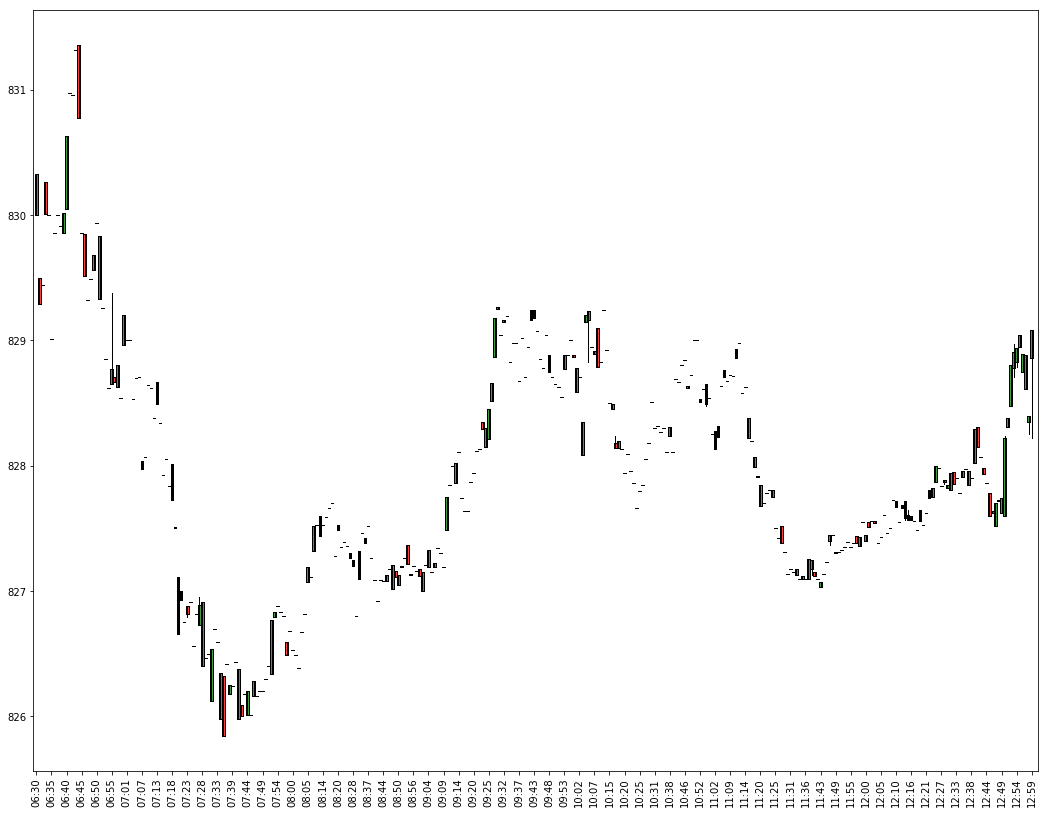

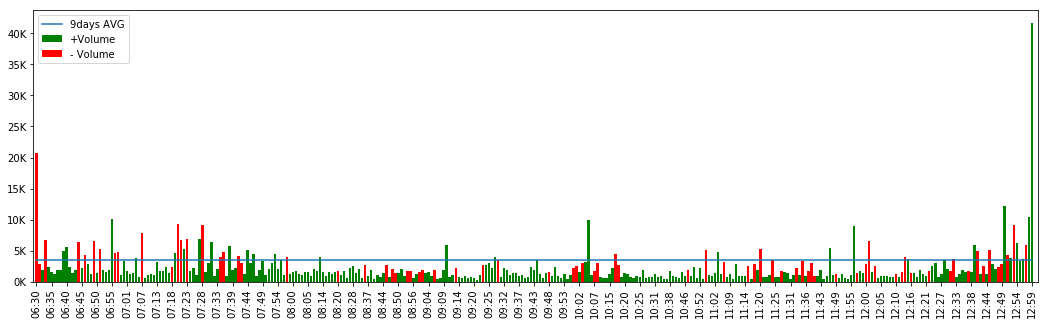

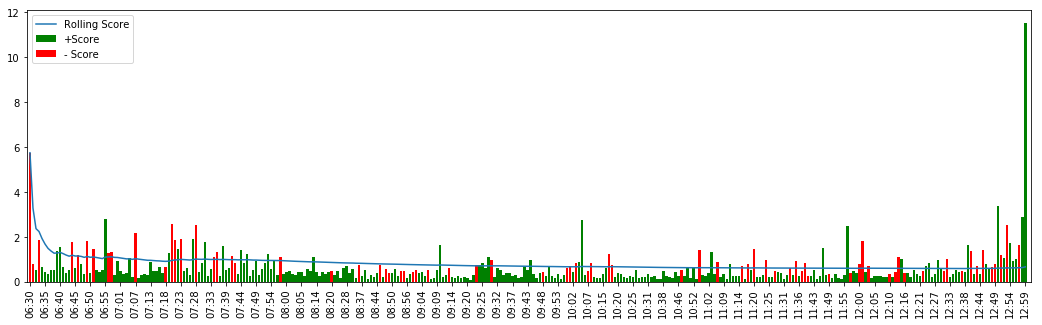

In [33]:
from matplotlib.finance import candlestick2_ochl
from matplotlib import pyplot as plt, ticker


def display_charts(df):
    df = df.reset_index()
    xticks = [n for n in range(0, len(df), 5)]
    
    # plot data
    fig = plt.figure(figsize=(18, 14)) 
    ax1 = plt.subplot(111)
    candlestick2_ochl(ax1, df.open, df.close, df.high, df.low, width=.9, colorup='g')
    ax1.set_xticks(xticks)
    ax1.set_xticklabels([df.loc[i].time.strftime('%H:%M') for i in ax1.get_xticks()], rotation=90)
    ax1.set_xlim(-1, len(df)+1)
    
    # Volume
    fig = plt.figure(figsize=(18, 5)) 
    ax2 = plt.subplot(111)
    positive = df[df.close >= df.open]
    negative = df[df.close < df.open]
    
    ax2.bar(positive.index, positive.volume, color='green', align='center', label="+Volume") 
    ax2.bar(negative.index, negative.volume, color='red', align='center', label="- Volume")
    ax2.set_xticks(xticks)
    ax2.set_xticklabels([df.time[i].strftime('%H:%M') for i in ax2.get_xticks()], rotation=90)
    ax2.set_xlim(-1, len(df)+1)
    # average volume
    ax2.plot(df.index, df.avg9days, label="9days AVG")
    ax2.legend(fancybox=True, loc='best')
    ax2.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x,p: "%dK" % (x / 1000)))
    
    fig = plt.figure(figsize=(18, 5)) 
    ax3 = plt.subplot(111)
    ax3.bar(positive.index, positive.current_score, color='green', align='center', label="+Score")
    ax3.bar(negative.index, negative.current_score, color='red', align='center', label="- Score")    
    ax3.plot(df.index, df.rolling_score, label="Rolling Score")
    ax3.legend(fancybox=True, loc='best')
    ax3.set_xticks(xticks)
    ax3.set_xticklabels([df.time[i].strftime('%H:%M') for i in ax2.get_xticks()], rotation=90)
    ax3.set_xlim(-1, len(df)+1)
    
    plt.show()

display_charts(all_dd[all_dd.symbol == "GOOG"])

1. CRM 12:59PM: Rolling Score 1.0738805806332135, Current Score 6.870474252233935


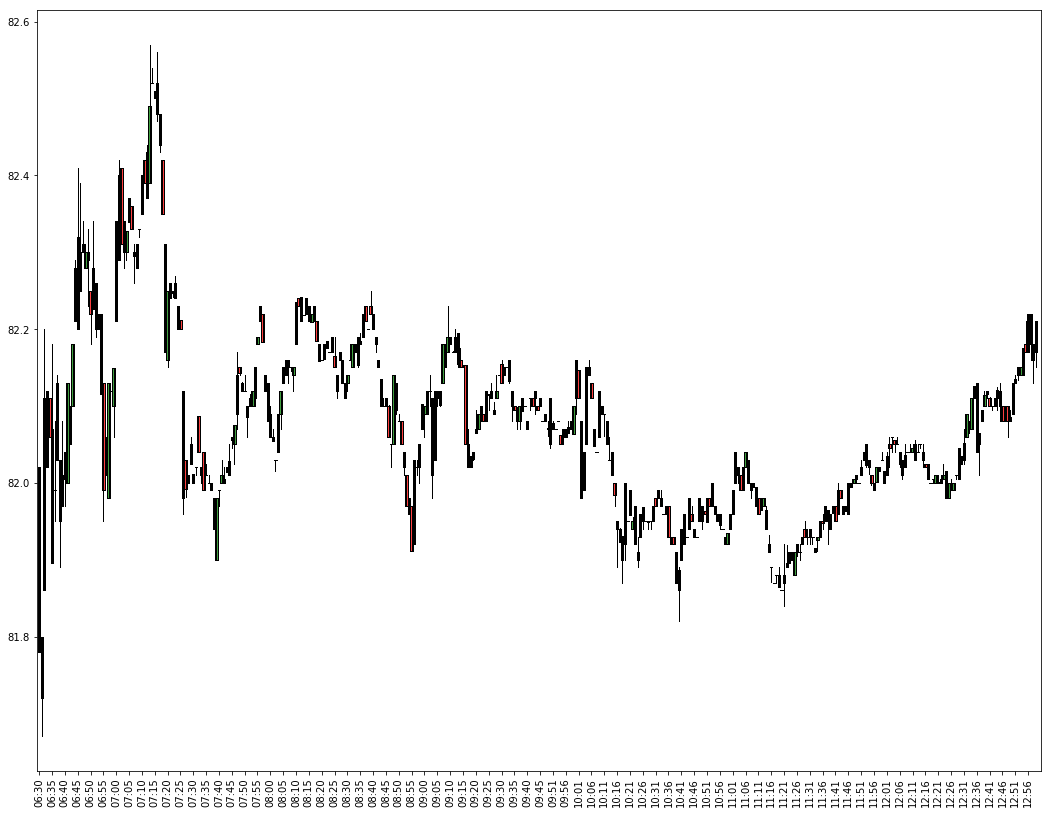

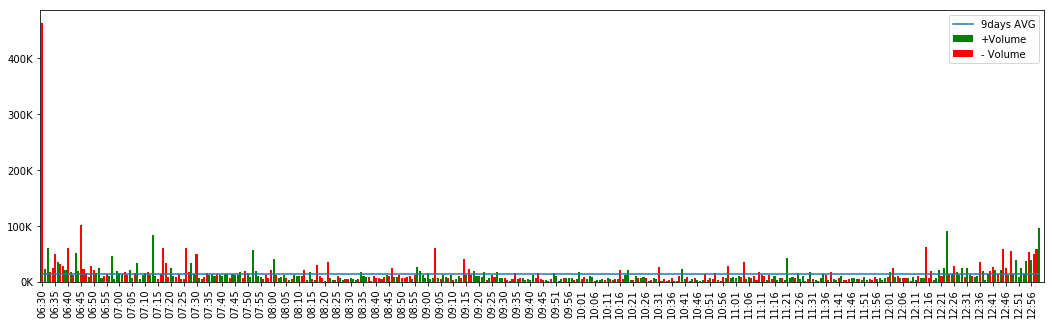

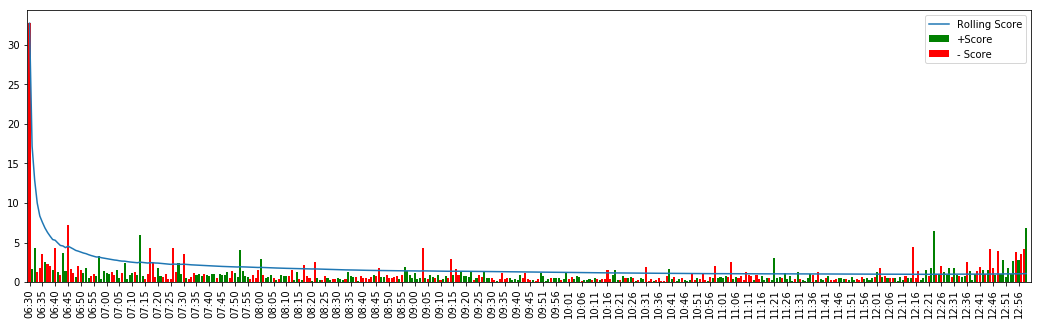

2. BAC 12:59PM: Rolling Score 1.0304643977596226, Current Score 9.654640572227862


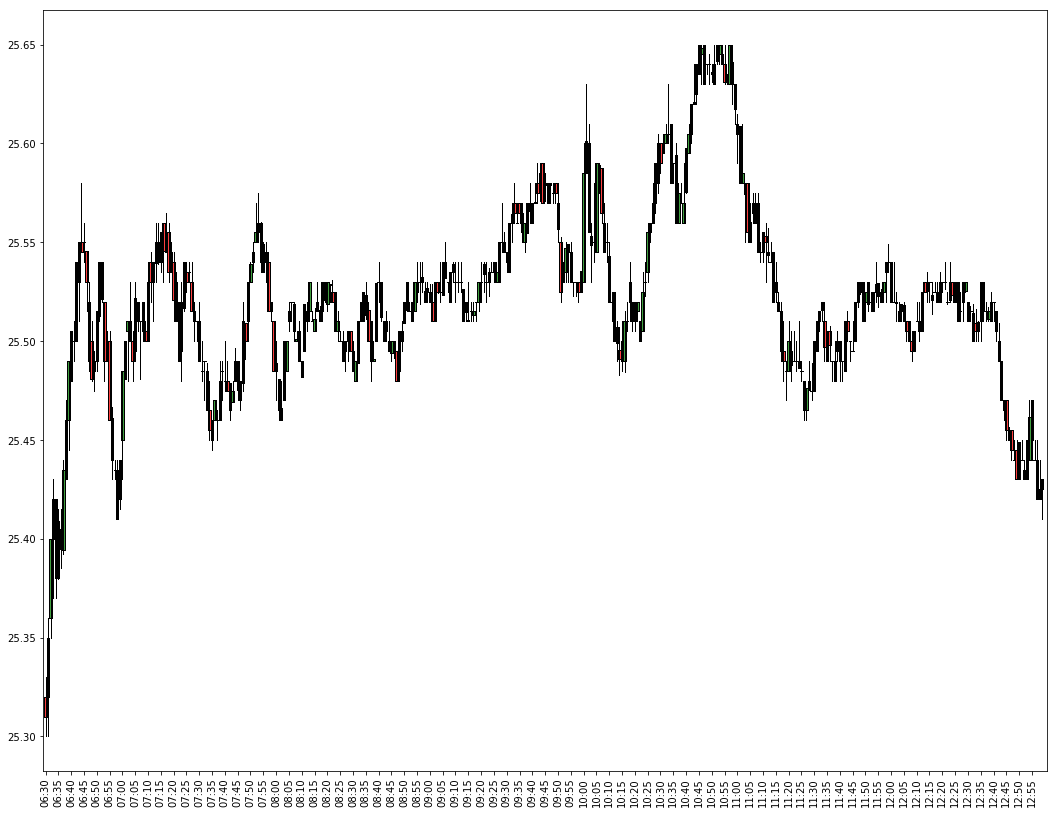

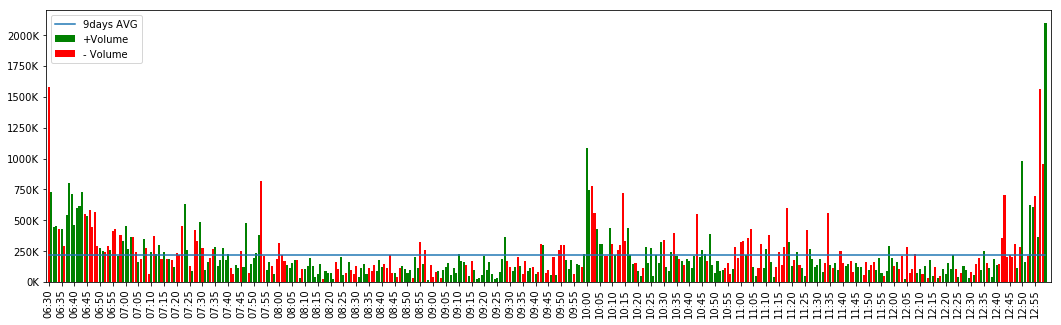

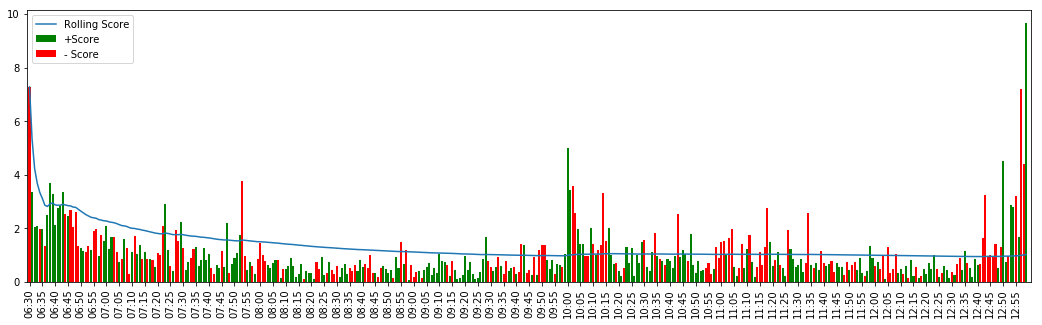

3. LOW 12:59PM: Rolling Score 0.8229491060373705, Current Score 6.8454362166055205


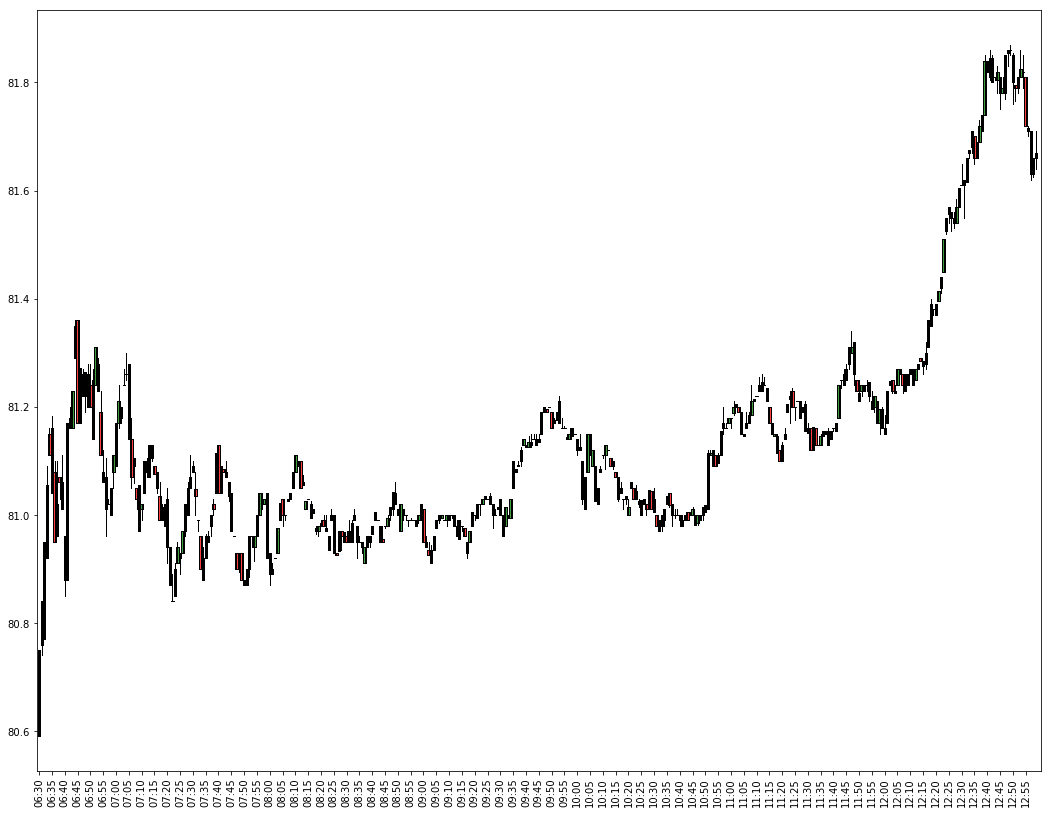

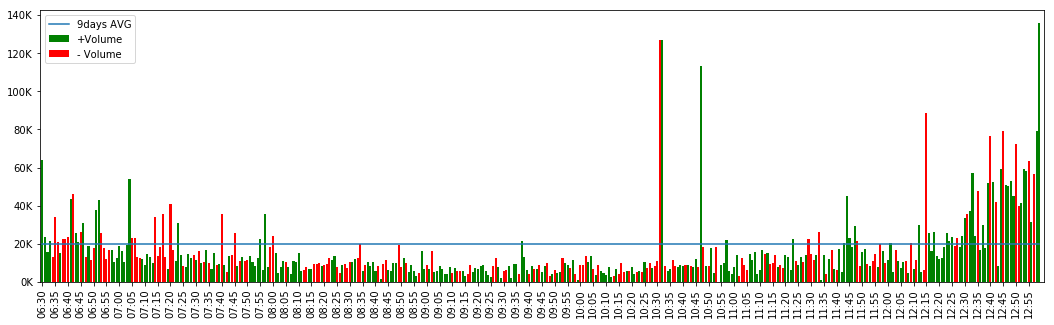

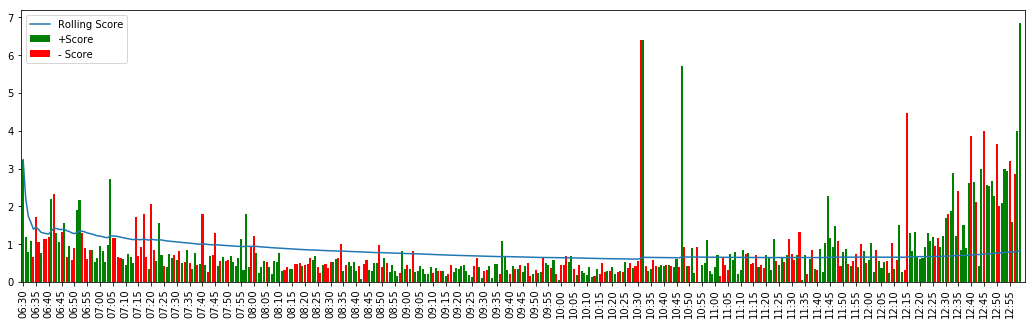

4. GOOG 12:59PM: Rolling Score 0.6779546246647662, Current Score 12.518230811988994


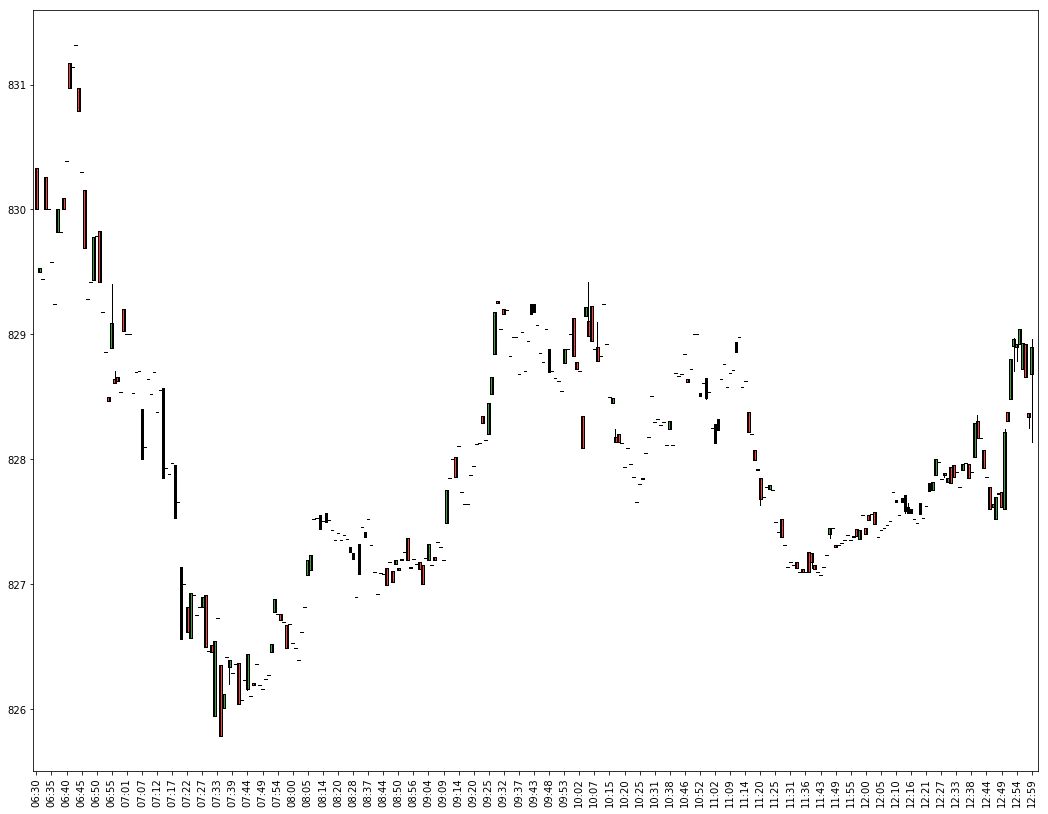

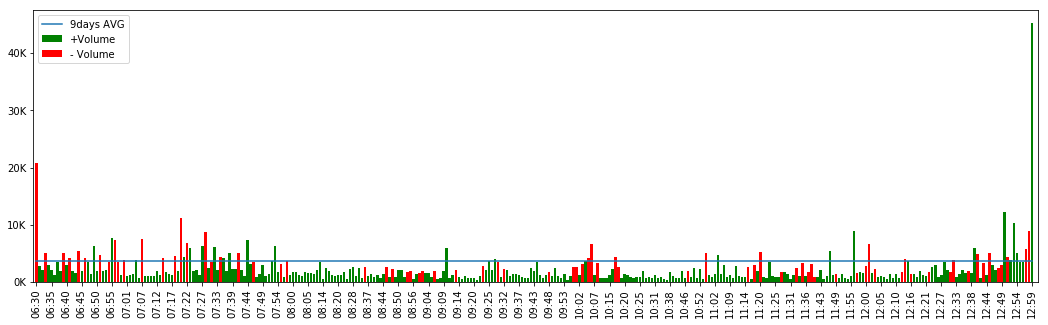

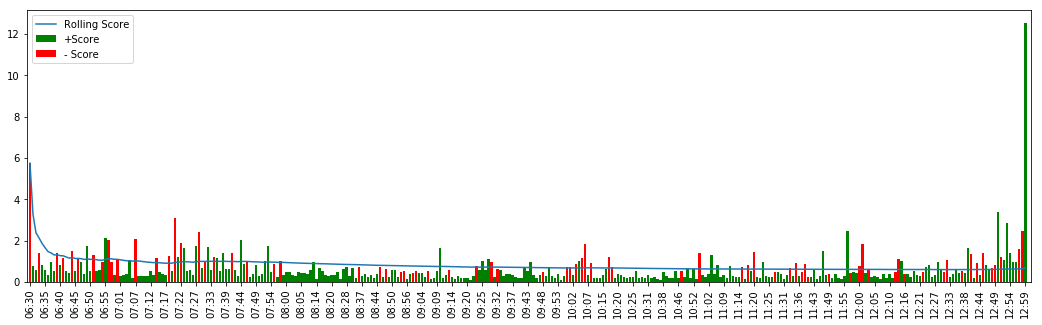

5. PCRX 12:59PM: Rolling Score 0.6703850641346278, Current Score 3.4406498610412783


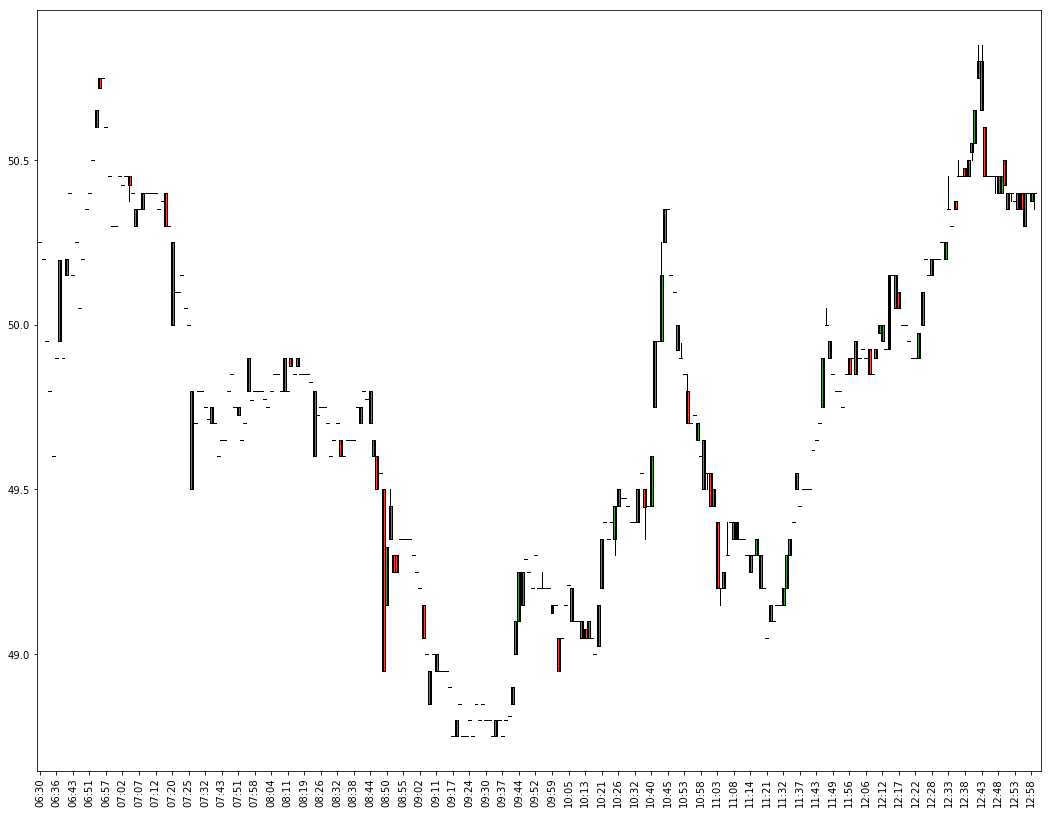

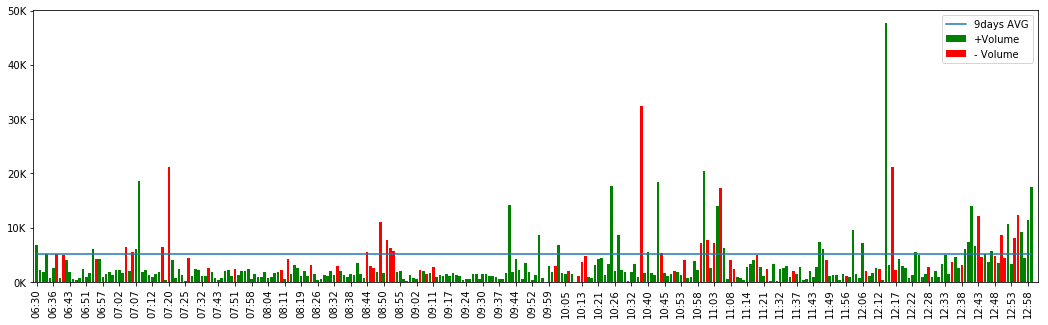

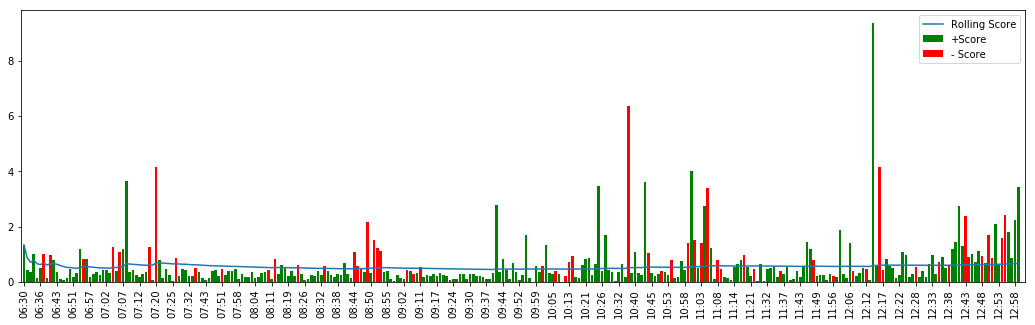

6. WTW 12:59PM: Rolling Score 0.3912390219061374, Current Score 1.1057889353761767


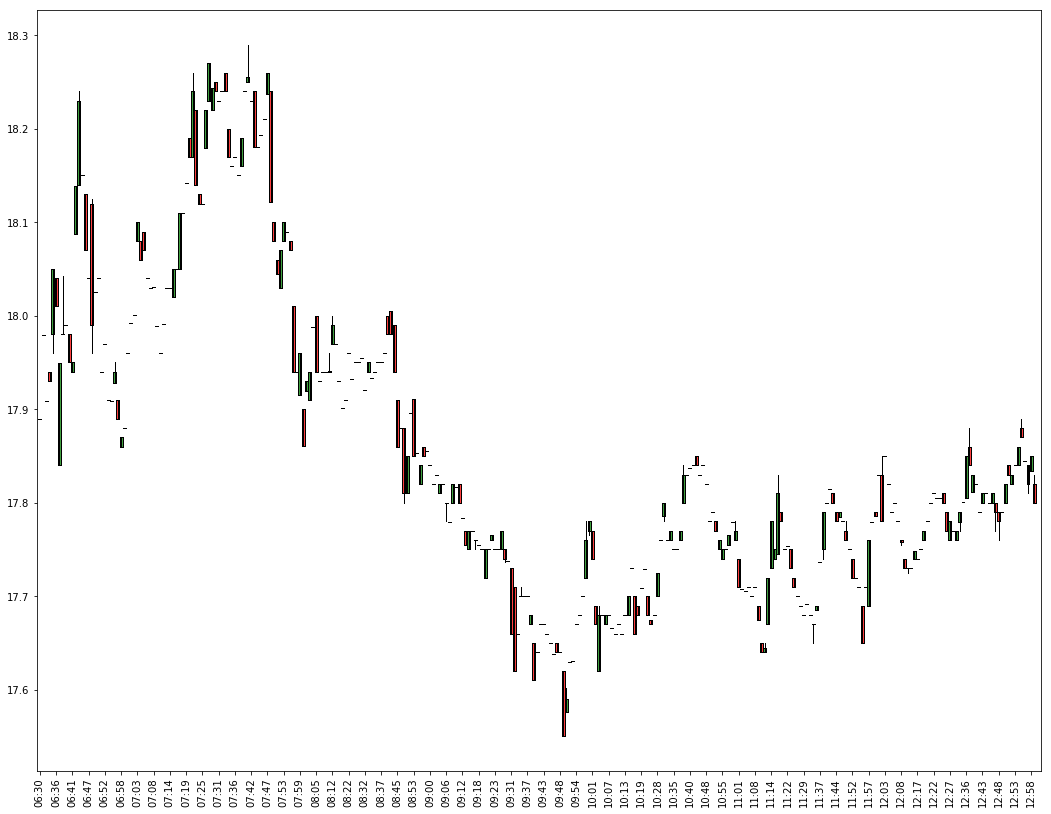

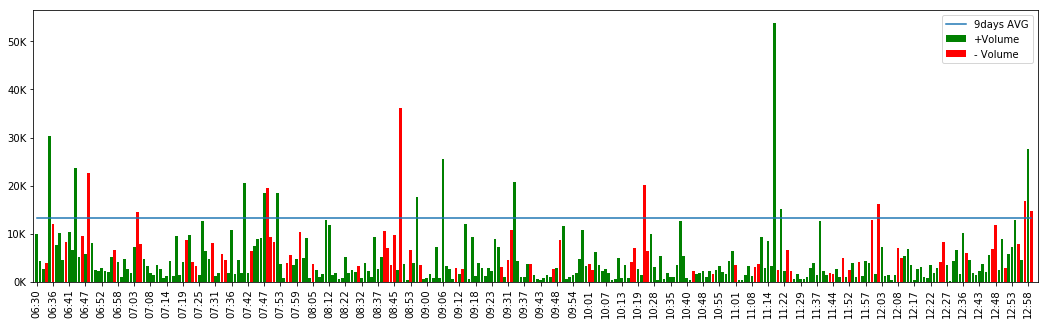

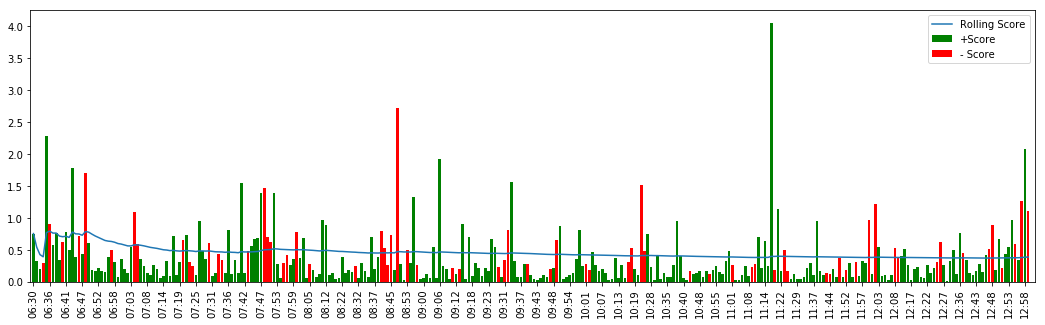

7. AAPL 12:59PM: Rolling Score 0.025027804874754107, Current Score 0.3367239265278332


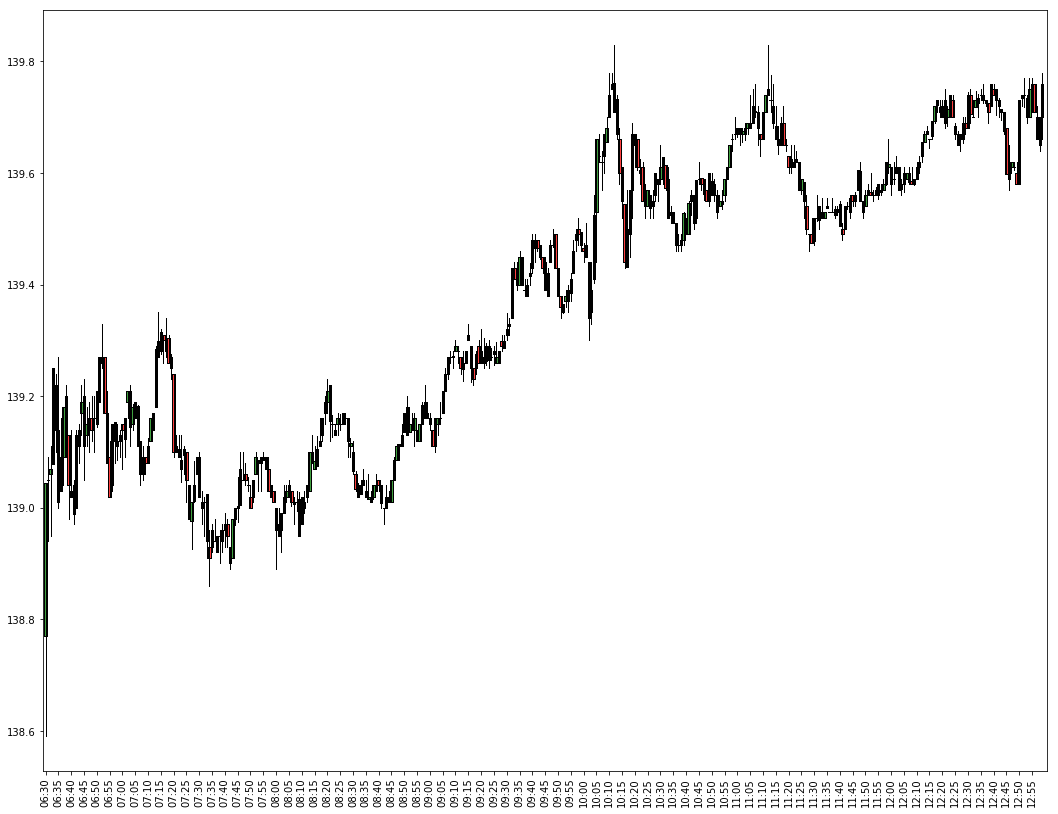

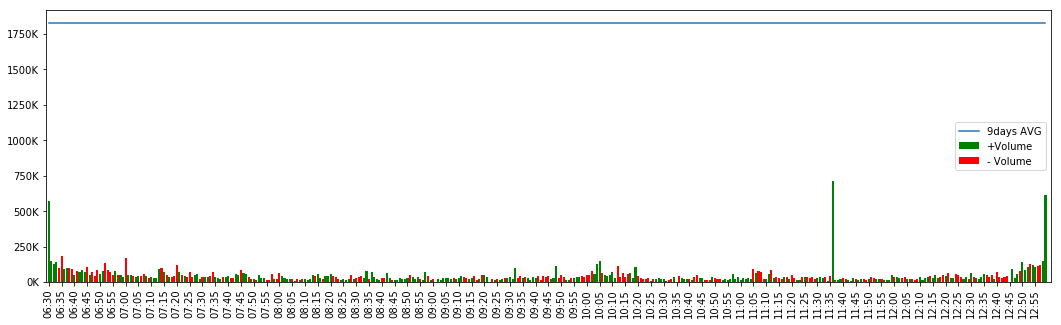

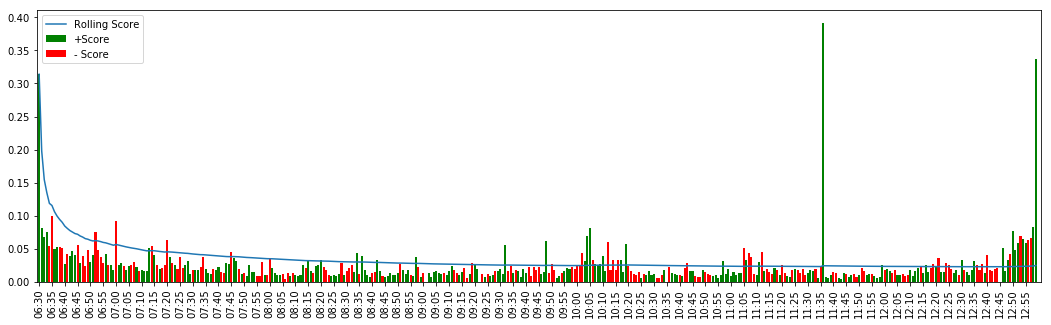

1. GOOG 12:59PM: Rolling Score 0.6779546246647662, Current Score 12.518230811988994


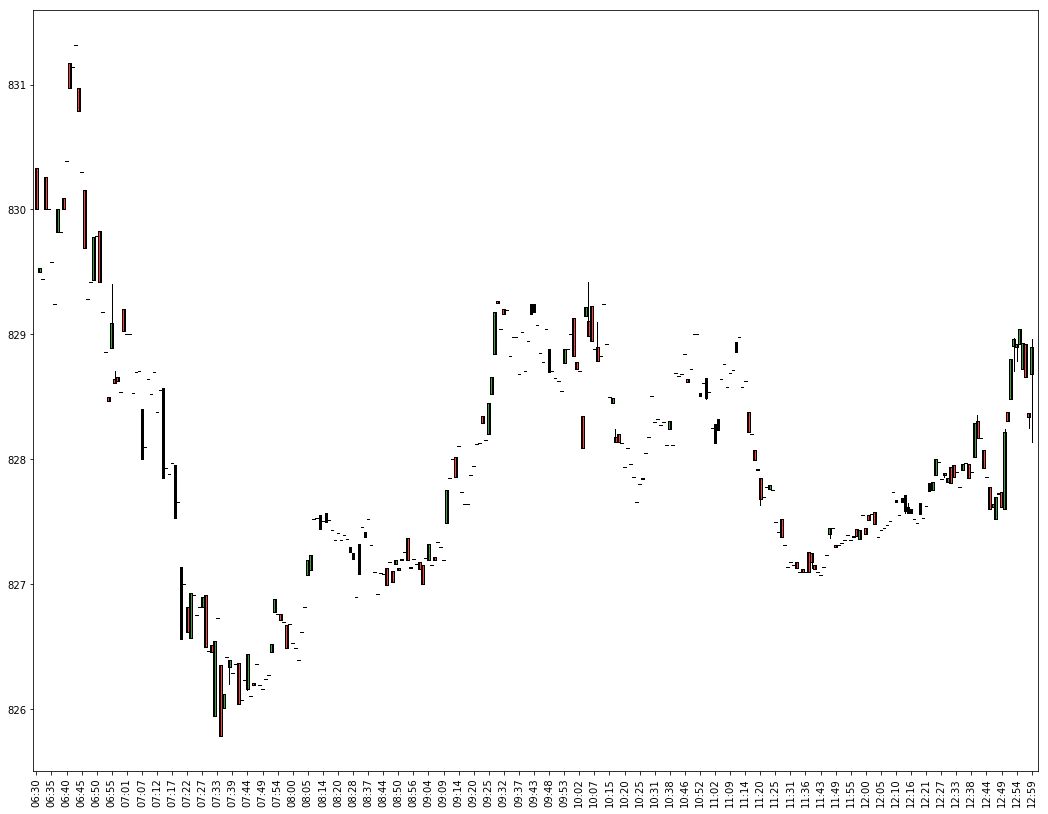

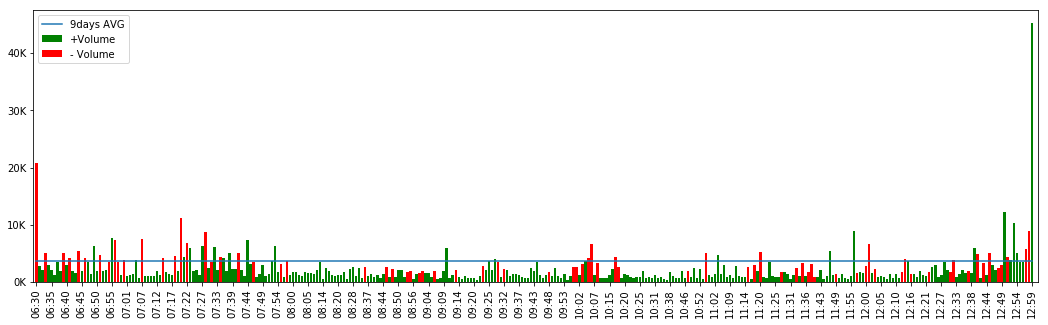

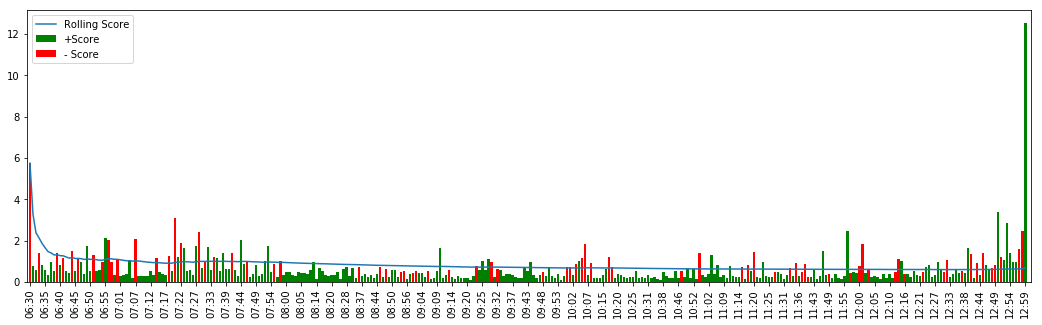

2. BAC 12:59PM: Rolling Score 1.0304643977596226, Current Score 9.654640572227862


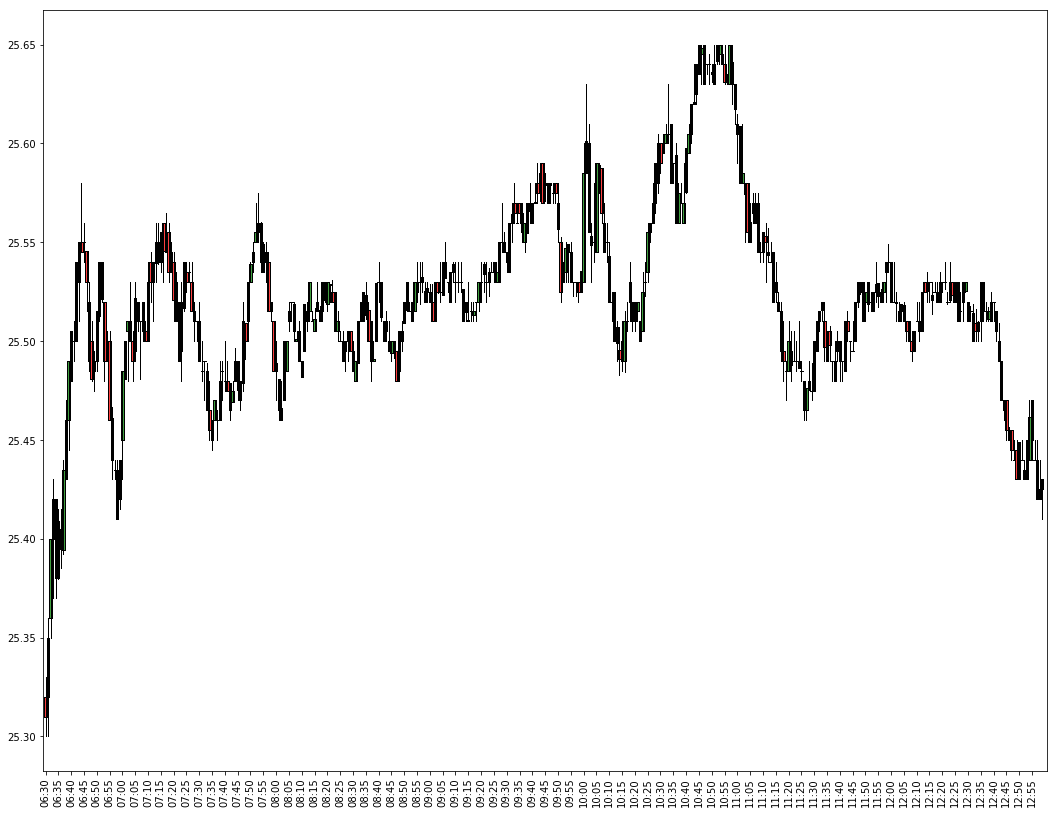

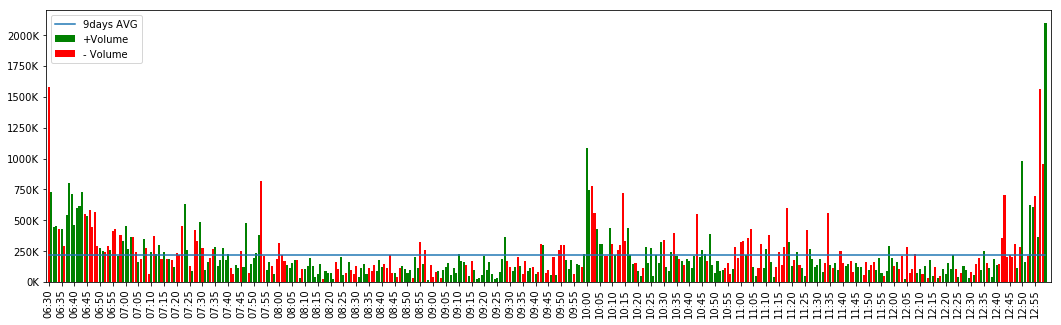

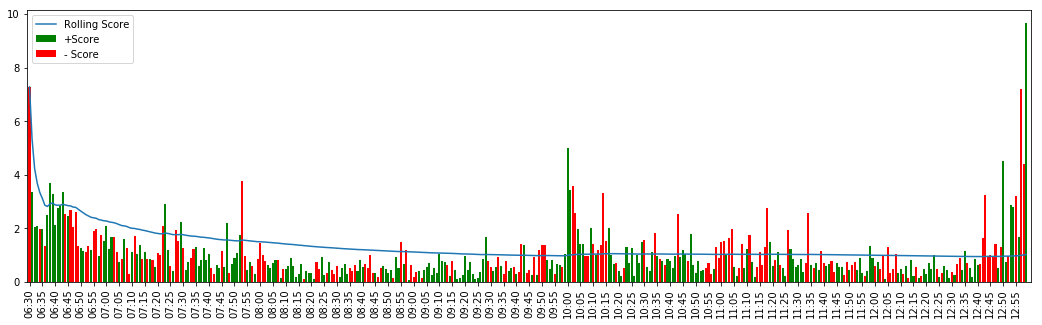

3. CRM 12:59PM: Rolling Score 1.0738805806332135, Current Score 6.870474252233935


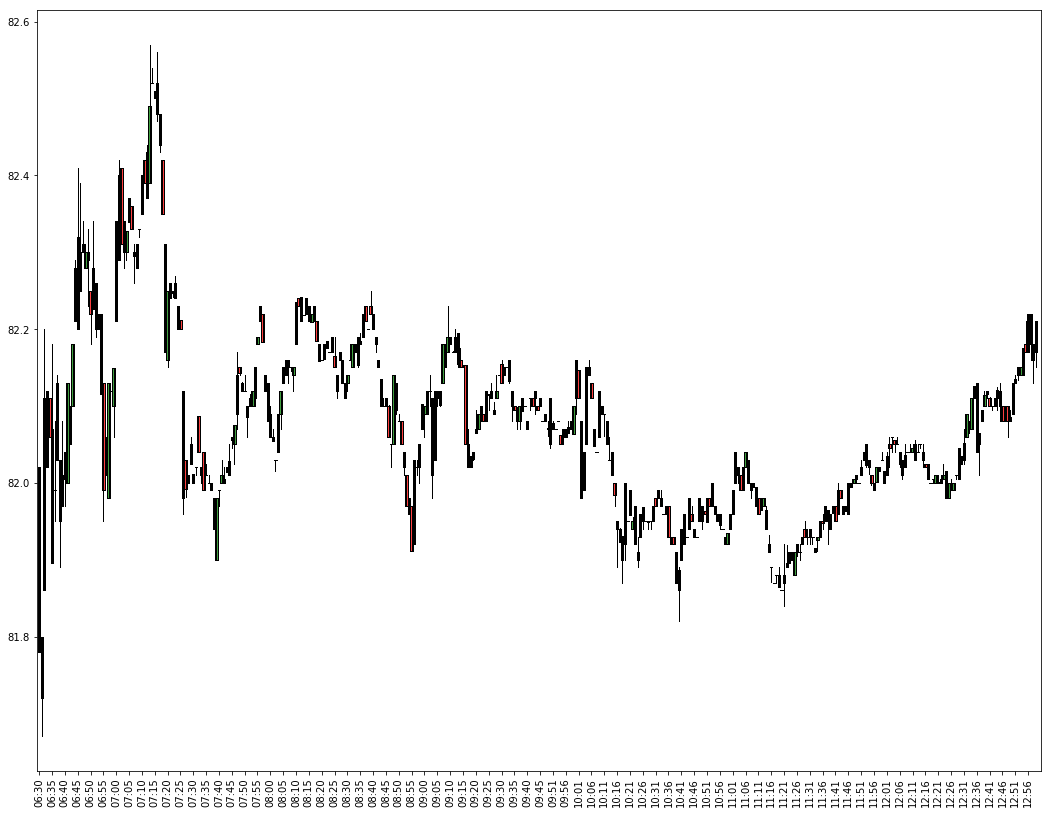

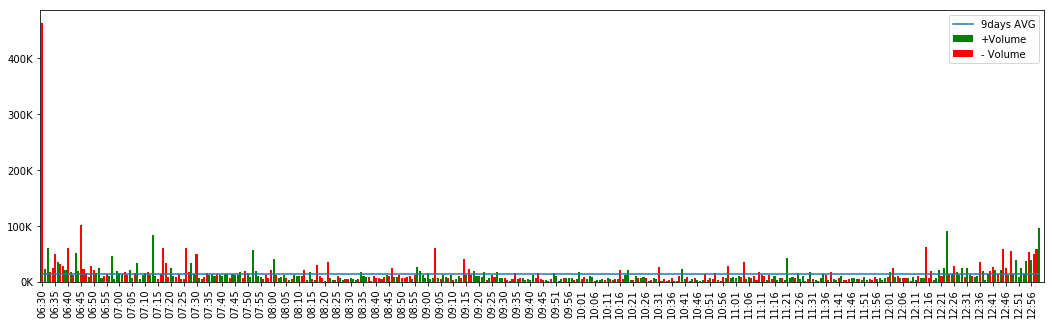

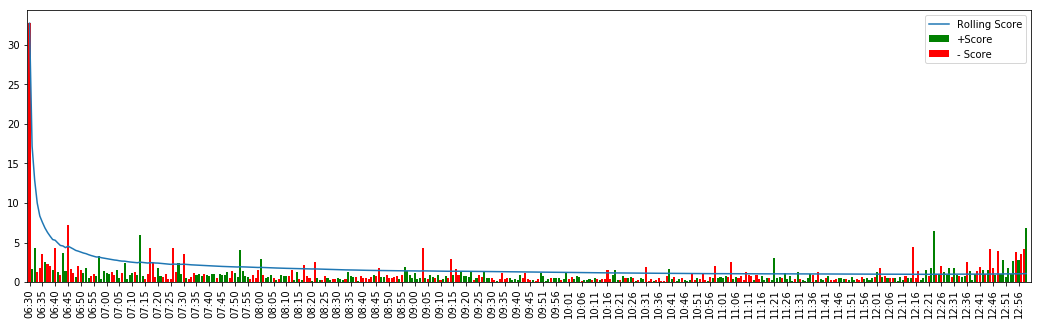

4. LOW 12:59PM: Rolling Score 0.8229491060373705, Current Score 6.8454362166055205


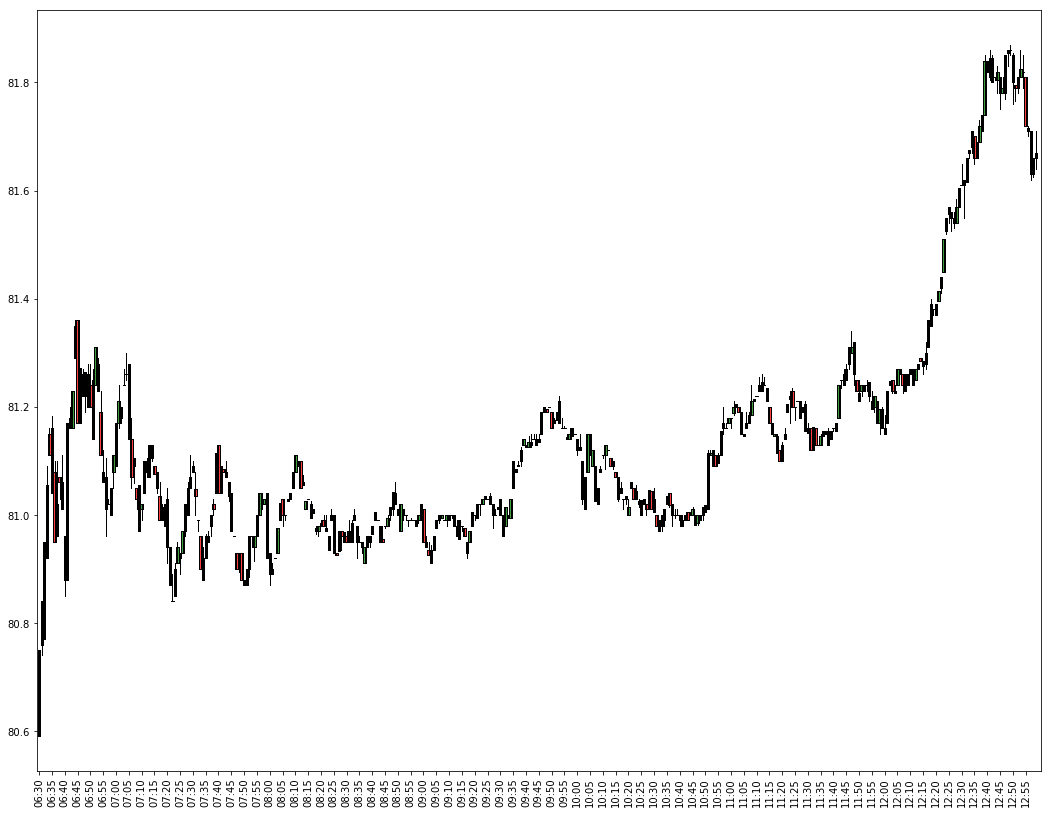

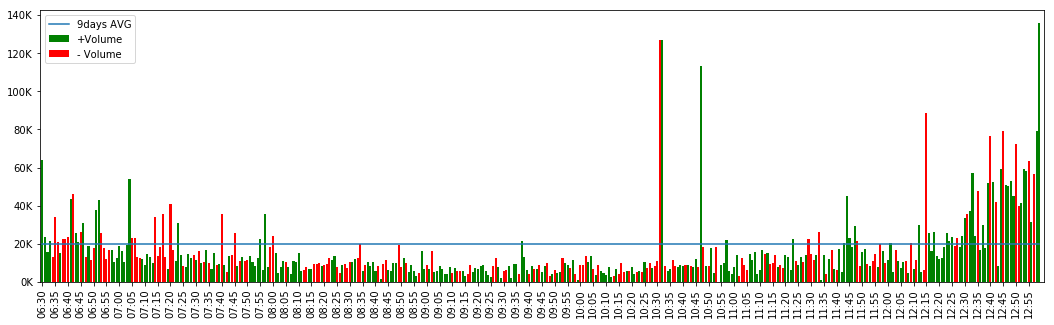

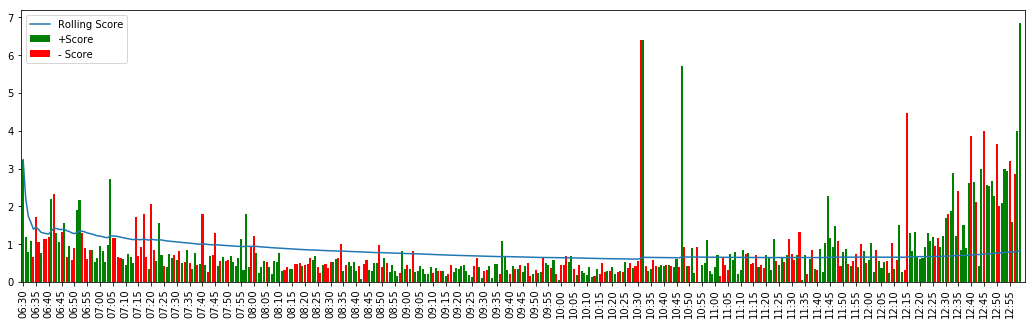

5. PCRX 12:59PM: Rolling Score 0.6703850641346278, Current Score 3.4406498610412783


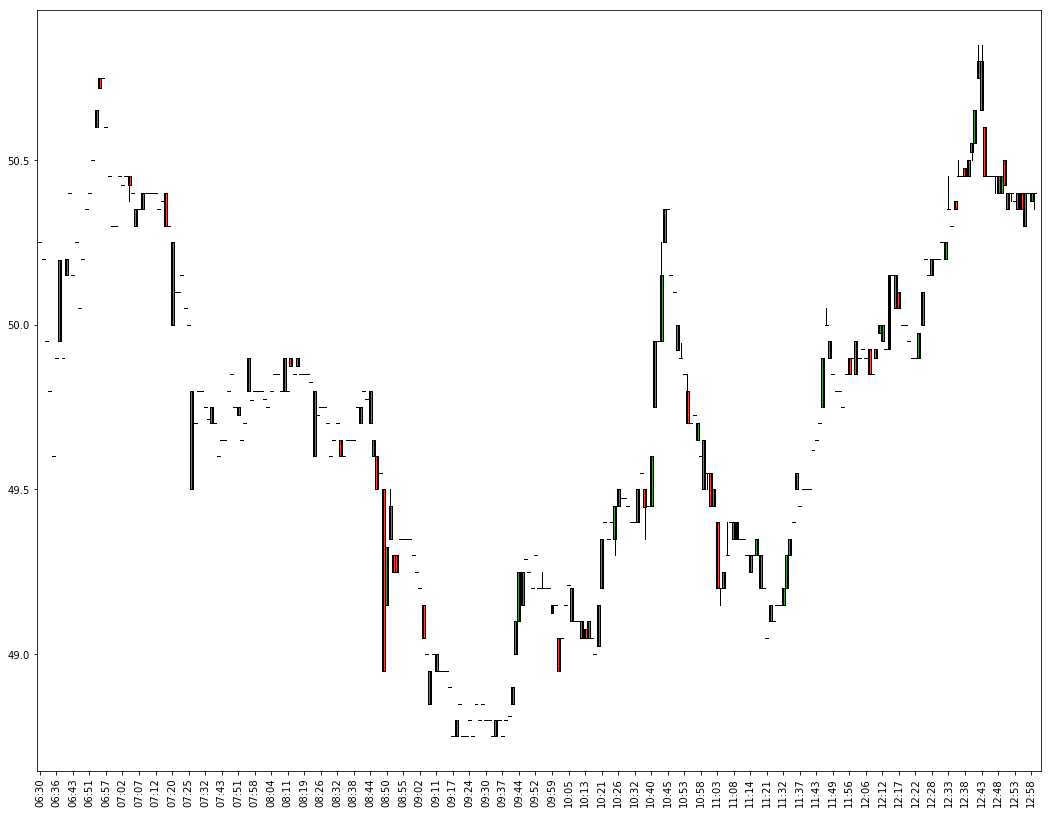

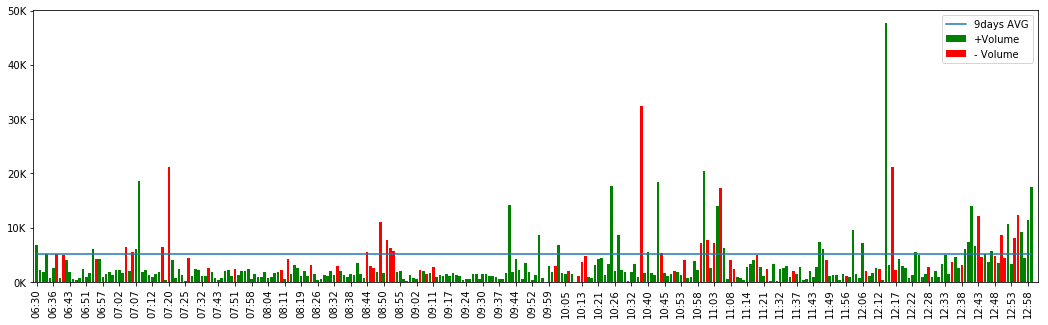

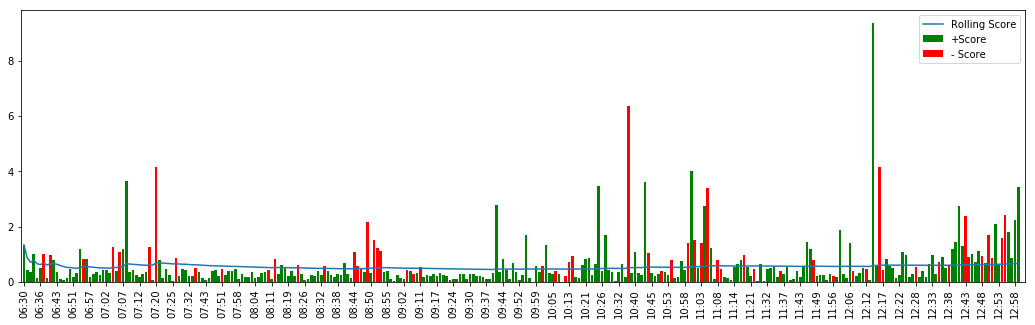

6. WTW 12:59PM: Rolling Score 0.3912390219061374, Current Score 1.1057889353761767


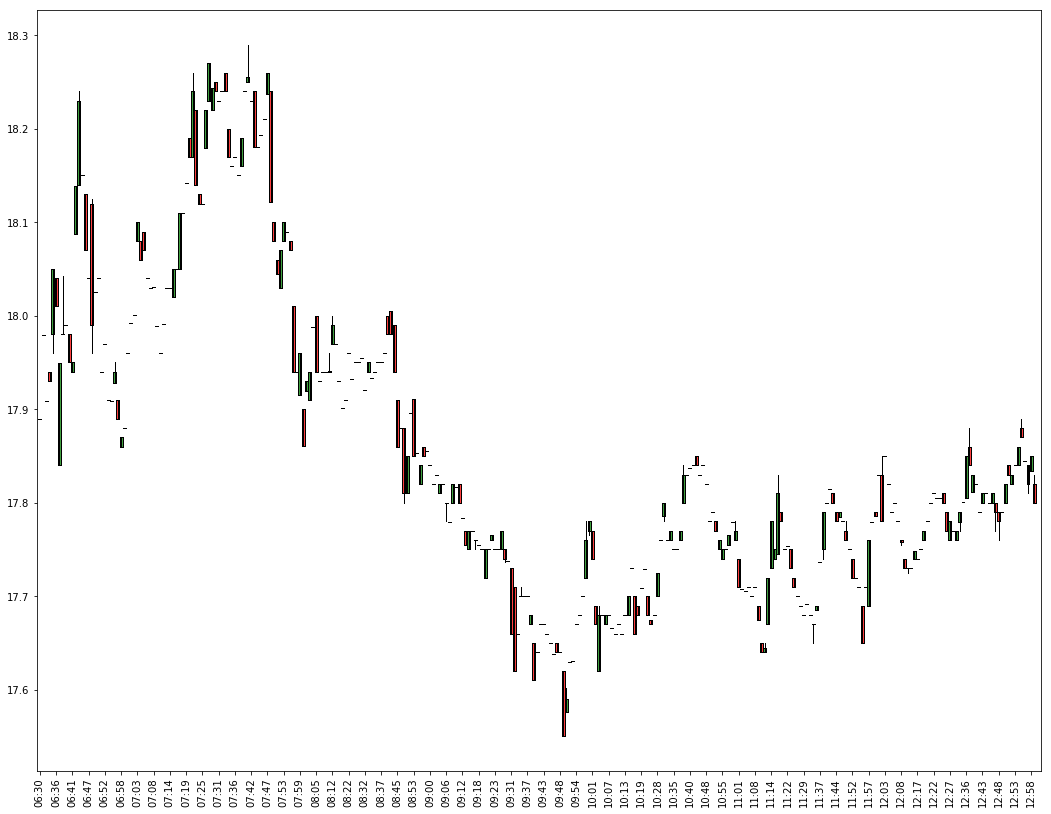

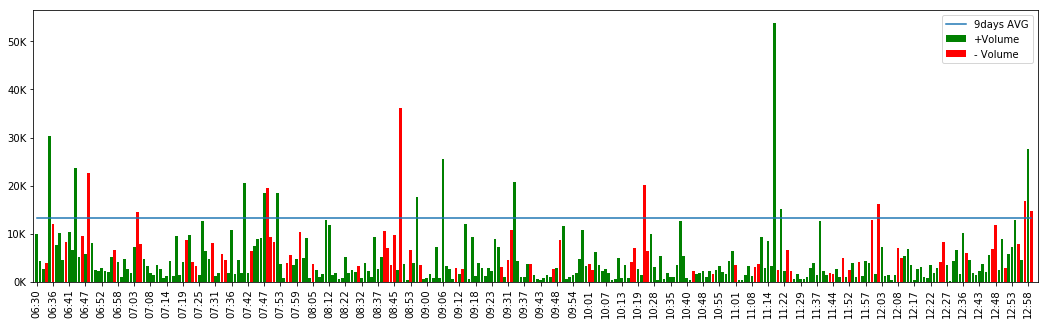

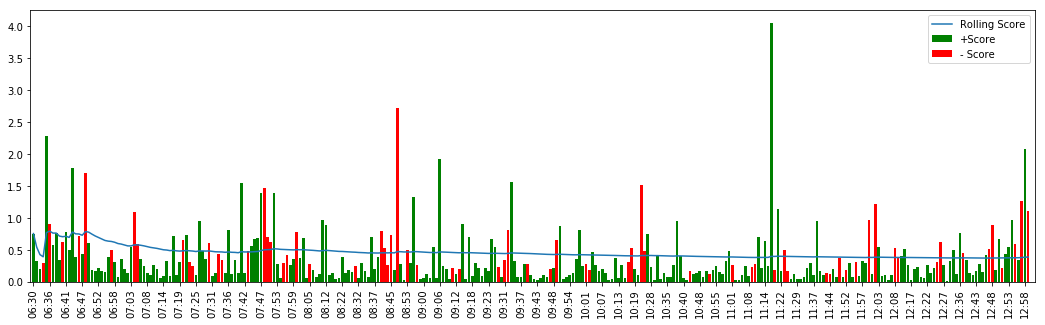

7. AAPL 12:59PM: Rolling Score 0.025027804874754107, Current Score 0.3367239265278332


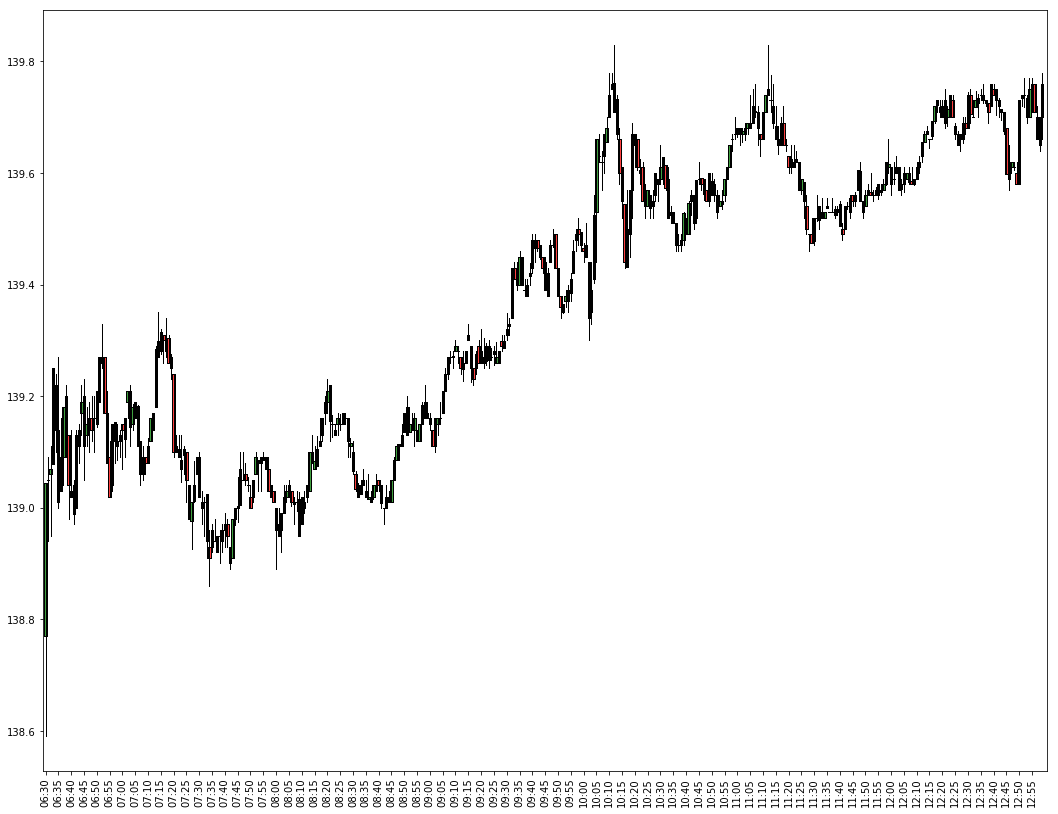

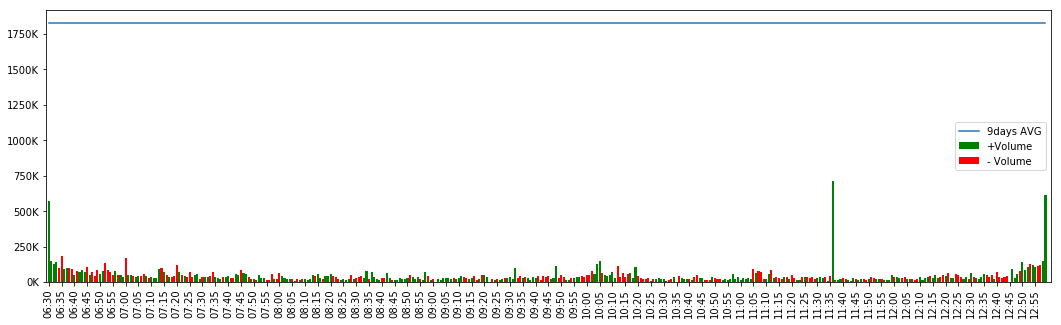

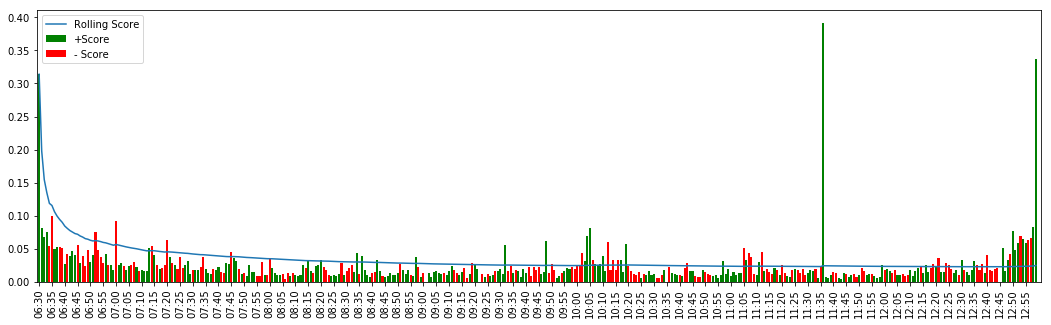

last update 2017-03-04 10:06:13.228483-08:00
prev update None
update time 0:00:52.597054


KeyboardInterrupt: 

In [34]:
from datetime import datetime, timedelta
from IPython.display import clear_output, display, HTML
import numpy as np
import pytz
from time import sleep

TOP_LIMIT = 10
LOCAL_TZ = 'America/Los_Angeles'
tz = pytz.timezone(LOCAL_TZ)
stocks = get_stocks()


def display_list_items(top_df, all_df):
    for n, item in enumerate(top_df.itertuples()):
        print(
            "{}. {} {}: Rolling Score {}, Current Score {}".format(
                n + 1, item.symbol, item.time.strftime("%I:%M%p"), 
                item.rolling_score, item.current_score
            )
        )
        display_charts(all_df[all_df.symbol == item.symbol])

last_time = None
start_date, end_date = None, None
while True:    
    now = datetime.now(tz=tz)
    start = now.replace(hour=6, minute=30, second=0, microsecond=0)
    stop = start.replace(hour=13, minute=0)
    
    if start <= now <= stop: # proper time for getting data
        
        if last_time: # no more often than once per minute
            diff = 60 - (now - last_time).seconds 
            if diff > 0:
                sleep(diff)
        
        if end_date is None or start_date is None:
            start_date, end_date = get_trading_dates(now)  
            
        df = get_data_parallel(stocks, start_date, end_date)
        
        if df is not None:
            clear_output()
            last_minute_data = df.groupby('symbol').last().reset_index()
            
            display(HTML("<h3>Rolling Score List</h3>"))           
            top_volimes = last_minute_data.sort_values(by='rolling_score', ascending=False)[:TOP_LIMIT]
            display_list_items(top_volimes, df)
            
            display(HTML("<h3>Current Score List</h3>"))
            top_volimes = last_minute_data.sort_values(by='current_score', ascending=False)[:TOP_LIMIT]
            display_list_items(top_volimes, df)                
         
        print("last update", now)
        print("prev update", last_time) 
        print("update time", datetime.now(tz=tz) - now)
        last_time = now        
    else:       
        start_date, end_date = None, None
        if now < start:
            diff = start - now
        else:
            start_tommorow = start + timedelta(days=1)
            diff = start_tommorow - now
            
        print("time to start:", diff)
        sleep(diff.seconds + diff.microseconds * 0.1 ** 6)